<a href="https://colab.research.google.com/github/Dots11/DavesProjects/blob/master/03_Tensorflow_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Get the data...

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-19 19:19:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   178MB/s    in 0.6s    

2022-08-19 19:19:18 (178 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os
os.listdir("pizza_steak")

['test', 'train']

In [ ]:
os.listdir("pizza_steak/test")

['steak', 'pizza']

In [ ]:
os.listdir("pizza_steak/train")

['steak', 'pizza']

In [ ]:
os.listdir("pizza_steak/train/steak")

['1163977.jpg',
 '1362989.jpg',
 '40762.jpg',
 '3425047.jpg',
 '3204977.jpg',
 '786409.jpg',
 '1324791.jpg',
 '503589.jpg',
 '996684.jpg',
 '114601.jpg',
 '2331076.jpg',
 '1155665.jpg',
 '3466159.jpg',
 '3100476.jpg',
 '250978.jpg',
 '3488748.jpg',
 '3576078.jpg',
 '2614649.jpg',
 '3613455.jpg',
 '1147883.jpg',
 '1888450.jpg',
 '1761285.jpg',
 '140832.jpg',
 '1053665.jpg',
 '417368.jpg',
 '947877.jpg',
 '1787505.jpg',
 '1836332.jpg',
 '911803.jpg',
 '2716993.jpg',
 '2544643.jpg',
 '669180.jpg',
 '1049459.jpg',
 '2361812.jpg',
 '168006.jpg',
 '714298.jpg',
 '3333735.jpg',
 '1976160.jpg',
 '388776.jpg',
 '1487113.jpg',
 '176508.jpg',
 '345734.jpg',
 '980247.jpg',
 '234626.jpg',
 '332232.jpg',
 '2979061.jpg',
 '1987213.jpg',
 '1595869.jpg',
 '2404884.jpg',
 '2324994.jpg',
 '1334054.jpg',
 '355715.jpg',
 '1987639.jpg',
 '3478318.jpg',
 '667075.jpg',
 '146833.jpg',
 '1563266.jpg',
 '907107.jpg',
 '2140776.jpg',
 '6926.jpg',
 '2173084.jpg',
 '165639.jpg',
 '1995118.jpg',
 '3894222.jpg',
 '36

In [ ]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# In MacOS, folders with no filenames may return '1' after a directory walkthrough - this is ".DS_Store", and is invisible in Mac machines. However, copying Mac files into Windows folders make this file visible.
# DS_Store holds the users folder view preferences.


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names # Mac users, add [1:] if "DS_Store" is there
print(class_names)

['pizza' 'steak']


In [ ]:
#Let's visualise our images
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import random
import pandas as pd
import tensorflow as tf

def view_random_image(target_dir, target_class): # this function will select an image randomally from the "data_dir" path, and plot that image
  # Setup the target directory (we'll view the images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) # randomally sample 1 image from the target folder path
  print(random_image)

  # Read in the iumage and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0]) # As this will return back the randomally selected image
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img # allows to display the array of the image

['2587918.jpg']
Image shape: (512, 512, 3)


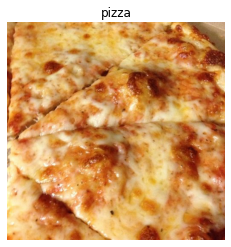

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
img # Why 'return img'? When image is read in via 'mpimg.imread', it returns a big array

array([[[196, 148,  72],
        [199, 151,  77],
        [199, 152,  80],
        ...,
        [199, 163, 131],
        [199, 163, 131],
        [193, 157, 125]],

       [[199, 151,  77],
        [202, 154,  80],
        [202, 155,  83],
        ...,
        [201, 165, 133],
        [201, 165, 133],
        [195, 159, 127]],

       [[200, 152,  78],
        [203, 155,  83],
        [203, 156,  86],
        ...,
        [200, 164, 132],
        [201, 165, 133],
        [196, 160, 128]],

       ...,

       [[216,  97,  15],
        [221, 102,  22],
        [226, 105,  26],
        ...,
        [109,  26,  18],
        [107,  24,  16],
        [105,  21,  11]],

       [[216,  99,  19],
        [227, 108,  28],
        [231, 112,  32],
        ...,
        [112,  30,  19],
        [109,  25,  15],
        [102,  18,   8]],

       [[220, 103,  23],
        [232, 115,  35],
        [237, 118,  36],
        ...,
        [117,  33,  23],
        [112,  25,  16],
        [102,  15,   5]]

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
# turn img into tensor
import tensorflow as tf
tf.constant(img)

# we will use these img tensors as inputs to our neural network

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[196, 148,  72],
        [199, 151,  77],
        [199, 152,  80],
        ...,
        [199, 163, 131],
        [199, 163, 131],
        [193, 157, 125]],

       [[199, 151,  77],
        [202, 154,  80],
        [202, 155,  83],
        ...,
        [201, 165, 133],
        [201, 165, 133],
        [195, 159, 127]],

       [[200, 152,  78],
        [203, 155,  83],
        [203, 156,  86],
        ...,
        [200, 164, 132],
        [201, 165, 133],
        [196, 160, 128]],

       ...,

       [[216,  97,  15],
        [221, 102,  22],
        [226, 105,  26],
        ...,
        [109,  26,  18],
        [107,  24,  16],
        [105,  21,  11]],

       [[216,  99,  19],
        [227, 108,  28],
        [231, 112,  32],
        ...,
        [112,  30,  19],
        [109,  25,  15],
        [102,  18,   8]],

       [[220, 103,  23],
        [232, 115,  35],
        [237, 118,  36],
        ...,
        [117,  33,  2

###Preprocess our Tensor

In [ ]:
### Homework: Preprocess our tensor

# First, find tensor attributes
shape = img.shape # returns width, height and colour channels
rank = img.ndim
axis = img.shape[0]
size = tf.size(img)
total_no_elements = tf.size(img).numpy()
shape, rank, axis, size, total_no_elements

((512, 512, 3),
 3,
 512,
 <tf.Tensor: shape=(), dtype=int32, numpy=786432>,
 786432)

**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing stepos for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value)

In [ ]:
# Get all the pixel values between o and 1 (Scale/normalize the data, as neural networks love values between 0 and 1)
img/255 # turns our array values into numbers, because model can't read images RGB

array([[[0.76862745, 0.58039216, 0.28235294],
        [0.78039216, 0.59215686, 0.30196078],
        [0.78039216, 0.59607843, 0.31372549],
        ...,
        [0.78039216, 0.63921569, 0.51372549],
        [0.78039216, 0.63921569, 0.51372549],
        [0.75686275, 0.61568627, 0.49019608]],

       [[0.78039216, 0.59215686, 0.30196078],
        [0.79215686, 0.60392157, 0.31372549],
        [0.79215686, 0.60784314, 0.3254902 ],
        ...,
        [0.78823529, 0.64705882, 0.52156863],
        [0.78823529, 0.64705882, 0.52156863],
        [0.76470588, 0.62352941, 0.49803922]],

       [[0.78431373, 0.59607843, 0.30588235],
        [0.79607843, 0.60784314, 0.3254902 ],
        [0.79607843, 0.61176471, 0.3372549 ],
        ...,
        [0.78431373, 0.64313725, 0.51764706],
        [0.78823529, 0.64705882, 0.52156863],
        [0.76862745, 0.62745098, 0.50196078]],

       ...,

       [[0.84705882, 0.38039216, 0.05882353],
        [0.86666667, 0.4       , 0.08627451],
        [0.88627451, 0

But doing this to every image in the dataset? Will take a long time...

There is a tensorflow function which allows normalization across entire dataset:

###**Building an end-to-end convolutional network example**

Let's build a convolutional neural network to find patterns in our image, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the seed
tf.random.set_seed(42)

# Preprocess our data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
valid_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),# still holds enough info from '(512,512)'
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
# Build a CNN (same as the TinyVGG on the CNN explainer)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    #tf.keras.layers.Activations(tf.nn.relu) # Optional, you can put 'relu' in its own layer
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit our model
history_1 = model_1.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 20s 182ms/step - loss: 0.5463 - accuracy: 0.7267 - val_loss: 0.3702 - val_accuracy: 0.8420
Epoch 2/10
47/47 [==============================] - 8s 174ms/step - loss: 0.4161 - accuracy: 0.8213 - val_loss: 0.3526 - val_accuracy: 0.8760
Epoch 3/10
47/47 [==============================] - 8s 172ms/step - loss: 0.3754 - accuracy: 0.8400 - val_loss: 0.3158 - val_accuracy: 0.8600
Epoch 4/10
47/47 [==============================] - 8s 172ms/step - loss: 0.3410 - accuracy: 0.8520 - val_loss: 0.3359 - val_accuracy: 0.8380
Epoch 5/10
47/47 [==============================] - 8s 171ms/step - loss: 0.3350 - accuracy: 0.8653 - val_loss: 0.2742 - val_accuracy: 0.8940
Epoch 6/10
47/47 [==============================] - 8s 172ms/step - loss: 0.2669 - accuracy: 0.9040 - val_loss: 0.2697 - val_accuracy: 0.8820
Epoch 7/10
47/47 [==============================] - 8s 171ms/ste

**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator (you may have to rerun some cells above).

In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 6s (69.0 MB/s)
(Reading database ... 155676 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155654 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+c

In [ ]:
# Steps per epoch - a count of batches in our training data
len(train_data)

47

In [ ]:
# We use batches because it gives our computer a chance to work on patterns from the data.
1500/32

46.875

Even though our model is working, it is taking too long to run without a GPU..

In [ ]:
# Without GPU

# Epoch 1/2
# 47/47 [==============================] - 106s 2s/step - loss: 0.5448 - accuracy: 0.7133 - val_loss: 0.3885 - val_accuracy: 0.8340

# With GPU

# Epoch 1/2
#47/47 [==============================] - 23s 212ms/step - loss: 0.5903 - accuracy: 0.6833 - val_loss: 0.3767 - val_accuracy: 0.8400

# 5x faster with GPU, though selecting it mid-way through program will remove files, so entire program needs to be re-run


The first epoch takes the longest as it is uploading the training_data on memory for our model to make patterns on.

In [ ]:
# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Practice**: CNN Explained https://poloclub.github.io/cnn-explainer/

##Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [Tensorflow playground]https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.82613&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
train_data

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit our model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 0.7215 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameterts than our CNN (model_1), model_2 performs terribly... let's try to improve it

In [ ]:
# Create model_3 to beat model_2's val_accuracy

# Set random seed
tf.random.set_seed(42)

# Create our model
model_3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation ="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")])

# Compile our model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit our model

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))
                              
        

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 3.4750 - accuracy: 0.6053 - val_loss: 0.7886 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 9s 181ms/step - loss: 0.7853 - accuracy: 0.7173 - val_loss: 0.8046 - val_accuracy: 0.6200
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.7916 - accuracy: 0.6927 - val_loss: 0.5316 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.5977 - accuracy: 0.7333 - val_loss: 0.4341 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4881 - accuracy: 0.7893 - val_loss: 0.7424 - val_accuracy: 0.6060


In [ ]:
# Get summary of module_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model_3 500x less parameters than model_1 CNN
15000000/31000

483.8709677419355

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Note:** You can think of trainable parameters **as patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even through there are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image than dense networks.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Creating our model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2893892.jpg']
Image shape: (512, 512, 3)
['1234172.jpg']
Image shape: (306, 512, 3)


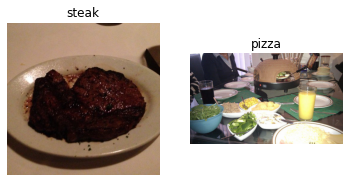

In [ ]:
# Visualize our data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

###2.  Preprocessing our data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...https://twitter.com/ylecun/status/989610208497360896?lang=en-GB

In [ ]:
# Check our GPU
!nvidia-smi

Fri Aug 19 19:23:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    35W / 250W |   2127MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.) # normalize via '255' and '.' to float it
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), #  Target size of images (height, width)
                                               class_mode="binary", # type of data you are working with
                                               batch_size=32) # size of minibatches to load
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)

# Create our CNN model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN model

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit our model

history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6781 - accuracy: 0.5973 - val_loss: 0.5353 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.5165 - accuracy: 0.7520 - val_loss: 0.4444 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.4333 - accuracy: 0.8087 - val_loss: 0.3653 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.4168 - accuracy: 0.8107 - val_loss: 0.3679 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.3797 - accuracy: 0.8373 - val_loss: 0.4634 - val_accuracy: 0.7640


In [ ]:
# Get a sample of a train data batch # the above 'ImageDataGenerator' automatically infers images and labels in both steak and pizza folders. Very handy
images, labels = train_data.next() # get the 'next' batch of images/labels in train_data
len(images), len(labels) # will return '32' for each because of batch_size

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images of the first batch
images[:2], images[0].shape

(array([[[[0.00784314, 0.01960784, 0.04705883],
          [0.01568628, 0.02745098, 0.05490196],
          [0.00784314, 0.01960784, 0.03921569],
          ...,
          [0.28627452, 0.11764707, 0.18431373],
          [0.25490198, 0.09019608, 0.14509805],
          [0.26666668, 0.10588236, 0.12156864]],
 
         [[0.00784314, 0.01960784, 0.04705883],
          [0.01176471, 0.02352941, 0.04313726],
          [0.00392157, 0.01960784, 0.03137255],
          ...,
          [0.40784317, 0.23529413, 0.29411766],
          [0.40784317, 0.23529413, 0.28627452],
          [0.41960788, 0.25490198, 0.27058825]],
 
         [[0.01568628, 0.02745098, 0.04705883],
          [0.01960784, 0.03137255, 0.0509804 ],
          [0.00784314, 0.02352941, 0.03529412],
          ...,
          [0.46274513, 0.28235295, 0.33333334],
          [0.42352945, 0.24313727, 0.28627452],
          [0.4431373 , 0.26666668, 0.2784314 ]],
 
         ...,
 
         [[0.1254902 , 0.08235294, 0.06666667],
          [0.12941

In [ ]:
images[7], images[7].shape

(array([[[0.7411765 , 0.6431373 , 0.62352943],
         [0.75294125, 0.65882355, 0.6431373 ],
         [0.7725491 , 0.69803923, 0.68235296],
         ...,
         [0.07058824, 0.02745098, 0.01960784],
         [0.0627451 , 0.03137255, 0.01960784],
         [0.0509804 , 0.03137255, 0.00784314]],
 
        [[0.7607844 , 0.6784314 , 0.65882355],
         [0.81568635, 0.7411765 , 0.7254902 ],
         [0.7960785 , 0.7372549 , 0.7254902 ],
         ...,
         [0.07843138, 0.03529412, 0.02745098],
         [0.07058824, 0.03137255, 0.02352941],
         [0.06666667, 0.03921569, 0.01568628]],
 
        [[0.78823537, 0.74509805, 0.7372549 ],
         [0.7137255 , 0.67058825, 0.6627451 ],
         [0.45882356, 0.41960788, 0.4156863 ],
         ...,
         [0.08627451, 0.03137255, 0.02745098],
         [0.07450981, 0.03137255, 0.01568628],
         [0.0627451 , 0.02745098, 0.00784314]],
 
        ...,
 
        [[0.9490197 , 0.9490197 , 0.9490197 ],
         [0.9843138 , 0.9843138 , 0.98431

In [ ]:
# View the first batch of labels
labels # e.g. 0 for pizza, 1 for steak etc.

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, #filters is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)), # Input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classifition so only 1 output neuron)
])

**Practice:** Understand what is going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes:https://poloclub.github.io/cnn-explainer/

In [ ]:
# Compile the model

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###4. Fit the model

In [ ]:
# Check the lengths of training and test data generators (in batches)
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data (no need to pass x and y as train data is a combination of both)
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 178ms/step - loss: 0.8200 - accuracy: 0.6380 - val_loss: 0.5060 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4485 - accuracy: 0.8000 - val_loss: 0.3697 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.3924 - accuracy: 0.8380 - val_loss: 0.4163 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.3042 - accuracy: 0.8853 - val_loss: 0.3826 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.1886 - accuracy: 0.9480 - val_loss: 0.3784 - val_accuracy: 0.8180


### 5. Evaluating our model
It looks like our model is learning something, let's evaluate it.

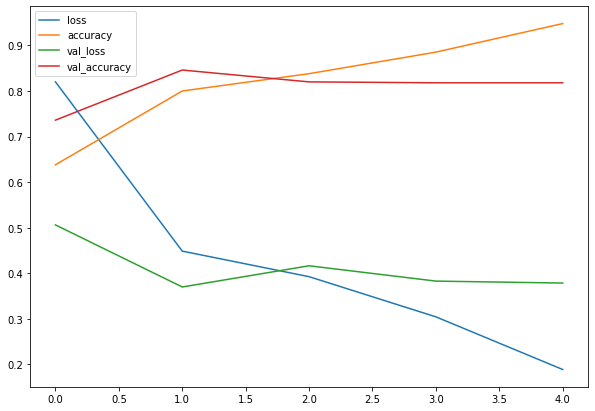

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?
  
  # Plot loss
  plt.figure() # create a separate plot for loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure() # create separate plot for accuracy
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, that it is learning the patterns of the dataset *too well*, and thus the model's ability to generalize the unseen data will be diminished.

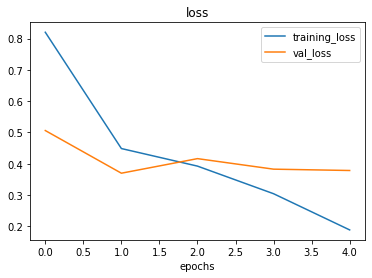

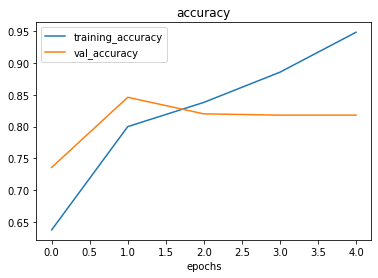

In [ ]:
# Check out the loss and accuracy of model_4

plot_loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to reduce overfitting:
* Increase the number of Conv layers 
* Increase the number of Conv filters/hidden units
* Add another dense layer to the output of our flattened layer.

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

**Note:** Reducing overfitting is also known as **regularization**

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit our model
history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6518 - accuracy: 0.5833 - val_loss: 0.5202 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4761 - accuracy: 0.7913 - val_loss: 0.3832 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4297 - accuracy: 0.8120 - val_loss: 0.3674 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.3775 - accuracy: 0.8393 - val_loss: 0.3105 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3577 - accuracy: 0.8520 - val_loss: 0.3079 - val_accuracy: 0.8900


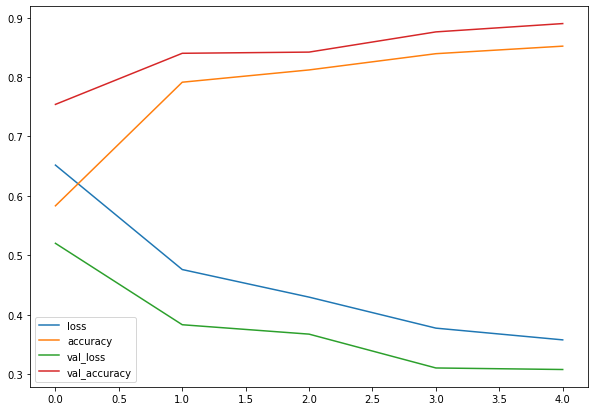

In [ ]:
# Evaluate our model_5 baseline model
import pandas as pd
pd.DataFrame(history_5.history).plot(figsize=(10,7))

In [ ]:
# Get a summary of our model_5 with max_pooling
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
# Get summary of model_4 (no max pooling)
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


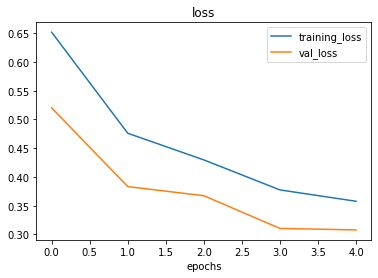

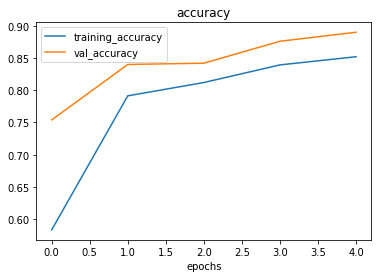

In [ ]:
# Now plot loss curves for model_5 (with max pooling)
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                         rotation_range=0.2, # How much do you want to rotate an image?
                                         shear_range=0.2, # how much do you want to shear an image
                                         zoom_range=0.2, # zoom in randomally on an image
                                         width_shift_range=0.2, # move your image around x-axis
                                         height_shift_range=0.3, # move your image around y-axis
                                         horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentaiton
train_datagen = ImageDataGenerator(rescale=1./255.)

# Create ImageDataGenerator without data augmentation of the test_dataset
test_datagen = ImageDataGenerator(rescale=1./255.)


**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...


In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size = 32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle= False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")


Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data.next() # train_data is not augmented
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)


showing image number: 30


(-0.5, 223.5, 223.5, -0.5)

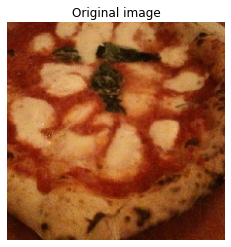

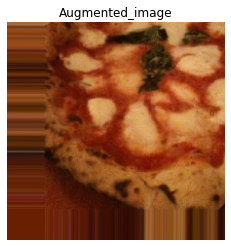

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0,32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented_image")
plt.axis(False)

Longer loading time as data augmentation loads data on a fly as it is loaded in

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size = 32,
                                                                   class_mode="binary",
                                                                   shuffle=True) # Shuffle enabled this time

Augmented training data
Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 491ms/step - loss: 0.6946 - accuracy: 0.5307 - val_loss: 0.6421 - val_accuracy: 0.6340
Epoch 2/5
47/47 [==============================] - 23s 479ms/step - loss: 0.6481 - accuracy: 0.6447 - val_loss: 0.6192 - val_accuracy: 0.6360
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6022 - accuracy: 0.6800 - val_loss: 0.4714 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 22s 461ms/step - loss: 0.5413 - accuracy: 0.7173 - val_loss: 0.3889 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5150 - accuracy: 0.7480 - val_loss: 0.3763 - val_accuracy: 0.8240


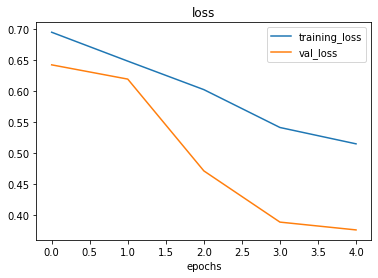

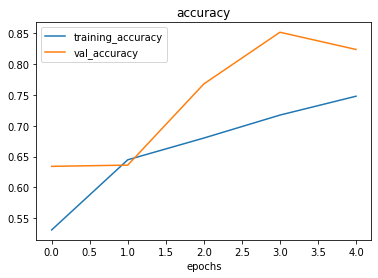

In [ ]:
# Plot loss curves for history 7
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied
Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own use case

**Practice** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                         rotation_range=0.2, # How much do you want to rotate an image?
                                         shear_range=0.2, # how much do you want to shear an image
                                         zoom_range=0.2, # zoom in randomally on an image
                                         width_shift_range=0.2, # move your image around x-axis
                                         height_shift_range=0.3, # move your image around y-axis
                                         horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentaiton
train_datagen = ImageDataGenerator(rescale=1./255.)

# Create ImageDataGenerator without data augmentation of the test_dataset
test_datagen = ImageDataGenerator(rescale=1./255.)


In [ ]:
# Recreate model_1 though augmented shuffled training data

# Create ImageDataGenerator training instance for our dataset
train_datagen_augmented_shuffled = ImageDataGenerator(rescale=1./255.,
                                                      rotation_range=0.2,
                                                      shear_range=0.2,
                                                      zoom_range=0.2,
                                                      width_shift_range=0.2,
                                                      height_shift_range=0.2,
                                                      horizontal_flip=True
                                                      )
# Create ImageDataGenerator without data augmentation of the test_dataset
test_datagen = ImageDataGenerator(rescale=1./255.)

# Import data and augment it from training_directory
train_data_augmented_shuffled=train_datagen_augmented_shuffled.flow_from_directory(directory=train_dir,
                                                                                   target_size=(224,224),
                                                                                   batch_size=32,
                                                                                   class_mode="binary",
                                                                                   shuffle=True)
IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")


Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_1)

model_8 = Sequential([
   Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(pool_size=2),
   Conv2D(10, 3, activation="relu"),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation="sigmoid")

])

# 2. Compile our model
model_8.compile(loss="binary_crossentropy",
                metrics=["accuracy"],
                optimizer=Adam())

# 3. Fit our model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 520ms/step - loss: 0.6341 - accuracy: 0.6373 - val_loss: 0.4427 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5401 - accuracy: 0.7580 - val_loss: 0.4214 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5069 - accuracy: 0.7760 - val_loss: 0.3928 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 21s 441ms/step - loss: 0.5078 - accuracy: 0.7720 - val_loss: 0.4039 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 22s 475ms/step - loss: 0.4904 - accuracy: 0.7813 - val_loss: 0.3609 - val_accuracy: 0.8700


In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


Downloading a a custom image to make our predictions on 

--2022-08-19 19:29:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-08-19 19:29:20 (44.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

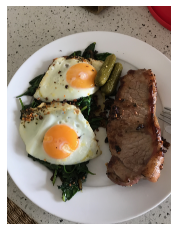

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False) # removes axes

In [ ]:
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediciton with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create an image to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):

  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all vallues between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Our 'steak' image has turned into a 'steak' tensor

In [ ]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))

This is a prediction probability, how likely the image belongs to either classes pizza(0), or steak(1).

Looks like our custom image is being put thorough our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))] 
pred_class

'steak'

Yes!!! Our image passed through!!!
Now to bring it all together...

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

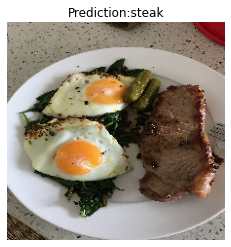

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg")

--2022-08-19 19:29:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.03s   

2022-08-19 19:29:23 (55.3 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]



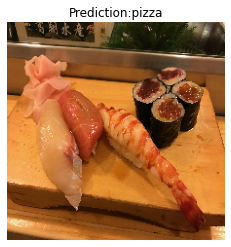

In [ ]:
# Test with another image (sushi)
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
pred_and_plot(model_8, "03-sushi.jpeg")

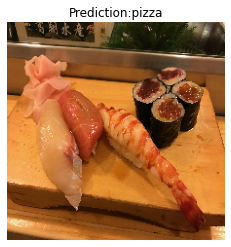

In [ ]:
# Make another image prediction
pred_and_plot(model_8, "03-sushi.jpeg")

##Multi-class Image Classification
We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak,now we're going to step things up a notch with 10 classes of food (multi_class classification)
1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting
7. Repeat until satisfied

##1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-08-19 19:29:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   210MB/s    in 2.4s    

2022-08-19 19:29:26 (210 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
# Walkthrough 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names # without tensorflow - only numpy and path objects
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
random.choice(class_names) # generates random class name from list class names (Food 101)

'ramen'

['881734.jpg']
Image shape: (512, 306, 3)


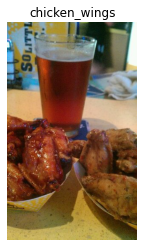

In [ ]:
# Visualise visualise visualise
import random
img = view_random_image(target_dir=train_dir, # we made view_random_image function earlier
                        target_class=random.choice(class_names))

There are 7,500 images in the training set

## 2. Preprocess the data (prepare it for a model)

In [ ]:
!nvidia-smi

Fri Aug 19 19:29:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    35W / 250W |   2127MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.) # normalize via '255' and '.' to float it
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), #  Target size of images (height, width)
                                               class_mode="categorical", # type of data you are working with
                                               batch_size=32) # size of minibatches to load
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224), # good baseline though not sitting stone
                                              class_mode="categorical", # multiclass
                                              batch_size=32)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


##3. Create our CNN model

In [ ]:
# do the above again
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually )
model_1 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation = "relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model

model_1.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit our model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))


Epoch 1/5
235/235 [==============================] - 41s 173ms/step - loss: 2.1880 - accuracy: 0.1951 - val_loss: 2.0788 - val_accuracy: 0.2476
Epoch 2/5
235/235 [==============================] - 41s 174ms/step - loss: 1.9614 - accuracy: 0.3125 - val_loss: 1.9064 - val_accuracy: 0.3408
Epoch 3/5
235/235 [==============================] - 39s 168ms/step - loss: 1.7730 - accuracy: 0.3987 - val_loss: 1.8395 - val_accuracy: 0.3636
Epoch 4/5
235/235 [==============================] - 43s 181ms/step - loss: 1.4852 - accuracy: 0.5035 - val_loss: 1.9737 - val_accuracy: 0.3348
Epoch 5/5
235/235 [==============================] - 39s 165ms/step - loss: 1.0580 - accuracy: 0.6644 - val_loss: 2.2642 - val_accuracy: 0.3156


In [ ]:
len(train_data)

235

As you can see, the model is taking longer to run due to the number of images it needs to make patterns from this time (7500 from 10 classes of Food101).

##4. Fit a model (see above)

##5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_1.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 2.2642 - accuracy: 0.3156


[2.2642126083374023, 0.3156000077724457]

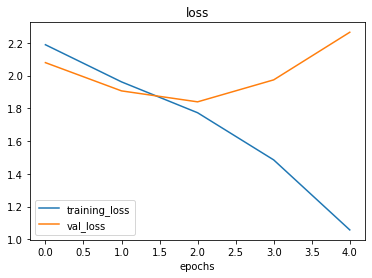

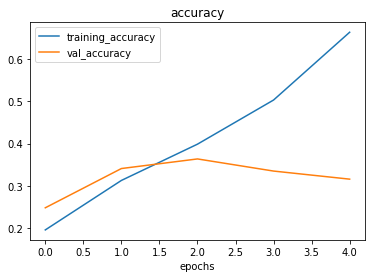

In [ ]:
# Check our the model's loss curves on the 10 classes
plot_loss_curves(history_1)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

##6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # of hidden units in layers.

* **Data augmentation** - data augmentation manipulates the training data insuch a way to add more diversity to it (without altering the original data)

* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [ ]:
# How about we try and simplify the model first? 

In [ ]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_22 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_24 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
# Let's try to remove a few Conv2D layers (x2)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                         rotation_range=0.2, # How much do you want to rotate an image?
                                         shear_range=0.2, # how much do you want to shear an image
                                         zoom_range=0.2, # zoom in randomally on an image
                                         width_shift_range=0.2, # move your image around x-axis
                                         height_shift_range=0.3, # move your image around y-axis
                                         horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentaiton
train_datagen = ImageDataGenerator(rescale=1./255.)

# Create ImageDataGenerator without data augmentation of the test_dataset
test_datagen = ImageDataGenerator(rescale=1./255.)


In [ ]:
# Create our model
model_2 = Sequential([Conv2D(filters=10, kernel_size=3, activation = "relu", input_shape = (224,224, 3)),
                             MaxPool2D(),
                             Conv2D(10,3, activation = "relu"),
                             MaxPool2D(),
                             Flatten(),
                             Dense(10, activation = "softmax")])

In [ ]:
# Compile our model
model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit our model
history_2 = model_2.fit(train_datagen_augmented, epochs=5, steps_per_epoch = len(train_datagen_augmented), validation_data = test_data, validation_steps = len(test_data))

TypeError: ignored

In [ ]:
model_2.summary()

In [ ]:
# Check out the plot_loss curve for model_2
plot_loss_curves(history_2)

Looks like our model simplification strategy didn't work... let's try including data augmentation to our model?

## Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data.

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                         rotation_range=0.2, # How much do you want to rotate an image?
                                         shear_range=0.2, # how much do you want to shear an image
                                         zoom_range=0.2, # zoom in randomally on an image
                                         width_shift_range=0.2, # move your image around x-axis
                                         height_shift_range=0.3, # move your image around y-axis
                                         horizontal_flip=True) # do you want to flip an image?


# Create ImageDataGenerator of the test_dataset (no data augmentation required)
test_datagen = ImageDataGenerator(rescale=1./255.)


In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen_augmented.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), #  Target size of images (height, width)
                                               class_mode="categorical", # type of data you are working with
                                               batch_size=32) # size of minibatches to load
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224), # good baseline though not sitting stone
                                              class_mode="categorical", # multiclass
                                              batch_size=32)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Create our model

model_3 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

# we could also:
# model_3 = tf.keras.models.clone_model(model_1)

In [ ]:
# Compile our model
model_3.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit our model
history_3 = model_3.fit(train_data, epochs = 5, steps_per_epoch= len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 102s 433ms/step - loss: 2.3230 - accuracy: 0.1256 - val_loss: 2.1864 - val_accuracy: 0.1952
Epoch 2/5
235/235 [==============================] - 101s 432ms/step - loss: 2.1886 - accuracy: 0.2029 - val_loss: 2.0606 - val_accuracy: 0.2664
Epoch 3/5
235/235 [==============================] - 101s 431ms/step - loss: 2.1315 - accuracy: 0.2295 - val_loss: 2.0168 - val_accuracy: 0.2716
Epoch 4/5
235/235 [==============================] - 102s 432ms/step - loss: 2.0912 - accuracy: 0.2577 - val_loss: 2.0126 - val_accuracy: 0.2724
Epoch 5/5
235/235 [==============================] - 102s 433ms/step - loss: 2.0618 - accuracy: 0.2677 - val_loss: 1.9885 - val_accuracy: 0.2860


In [ ]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_28 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_30 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

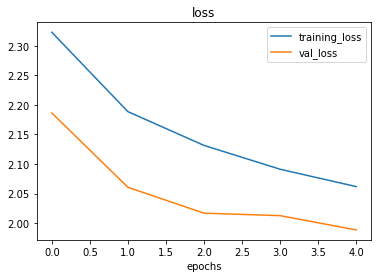

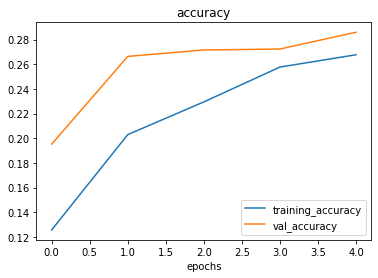

In [ ]:
# Plot loss curve of model with data augmentation

plot_loss_curves(history_3)

In comparison to before:

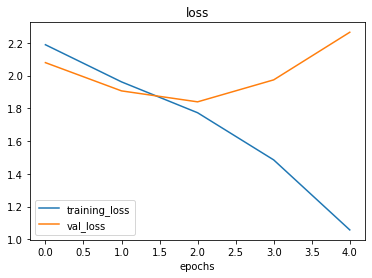

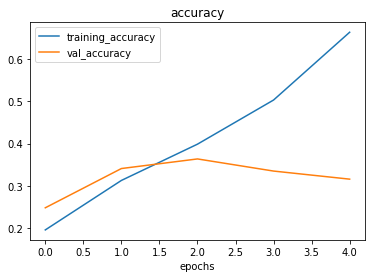

In [ ]:
plot_loss_curves(history_1)

That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the direction) so if we were to train for longer, we might see further improvements.

## 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experimetns, namely:
* restructuring our model's architecture (increasing layers/ hidden units)
* adjust the learning rates
* try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* training for longer(e.g. 10 epochs instead of 5 epochs)
* try **transfer learning**

###Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
# Remind ourselves of the classes our model is trained on
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# Download some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg



--2022-08-19 19:48:58--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg.4’

03-steak.jpeg.4         [ <=>                ] 134.70K  --.-KB/s    in 0.02s   

2022-08-19 19:48:59 (6.35 MB/s) - ‘03-steak.jpeg.4’ saved [137928]



In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):

  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  #print(len(pred[0])) #(shows length of pred tensor )
  #print(tf.argmax(pred)) #prints maximum tensor )

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else: # for binary classification
    pred_class = class_names[int(tf.round(pred[0]))]


  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


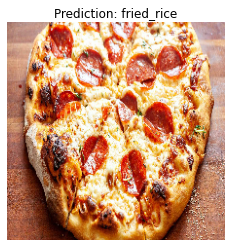

In [ ]:
# Make a prediction using model_3
pred_and_plot(model=model_3, # Trained on pizza vs steak
              filename="pepperoni-pizza.jpg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~29% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

##Saving and loading our model

In [ ]:
# Save a model
model_3.save("saved_trained_model_3")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_3 = tf.keras.models.load_model("saved_trained_model_3")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 10s 123ms/step - loss: 1.9885 - accuracy: 0.2860


[1.98847496509552, 0.28600001335144043]

In [ ]:
# Compare our loaded model to our existing model
model_3.evaluate(test_data)

79/79 [==============================] - 10s 125ms/step - loss: 1.9885 - accuracy: 0.2860


[1.9884754419326782, 0.28600001335144043]